Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Importing the Dataset

In [7]:
dataset = pd.read_csv('..\\Dataset\\Social_Network_Ads.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

#Display dataset 
print(dataset)

     Age  EstimatedSalary  Purchased
0     19            19000          0
1     35            20000          0
2     26            43000          0
3     27            57000          0
4     19            76000          0
..   ...              ...        ...
395   46            41000          1
396   51            23000          1
397   50            20000          1
398   36            33000          0
399   49            36000          1

[400 rows x 3 columns]


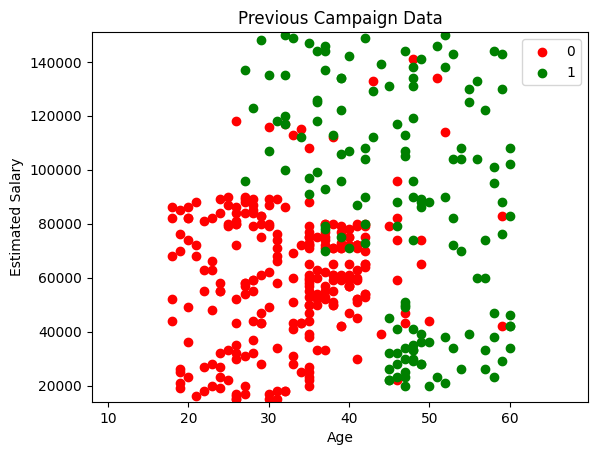

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.axes._axes import _log as matplotlib_axes_logger

matplotlib_axes_logger.setLevel('ERROR')

X_set, y_set = X, y

X1, X2 = np.meshgrid(
    np.arange(start=X_set[:, 0].min() - 10, stop=X_set[:, 0].max() + 10, step=0.25),
    np.arange(start=X_set[:, 1].min() - 1000, stop=X_set[:, 1].max() + 1000, step=0.25)
)

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                color=['red', 'green'][i], label=j)

plt.title('Previous Campaign Data')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

Feature Scaling

In [9]:
from sklearn.preprocessing import StandardScaler
se = StandardScaler()
X_ac = se.fit_transform(X)

Training the Logistic Regression model on the Previouse Campaign

In [10]:
from sklearn.linear_model import LogisticRegression
cnn_model = LogisticRegression(random_state=0)
cnn_model.fit(X_ac, y)

LogisticRegression(random_state=0)

Visualising the Model Results

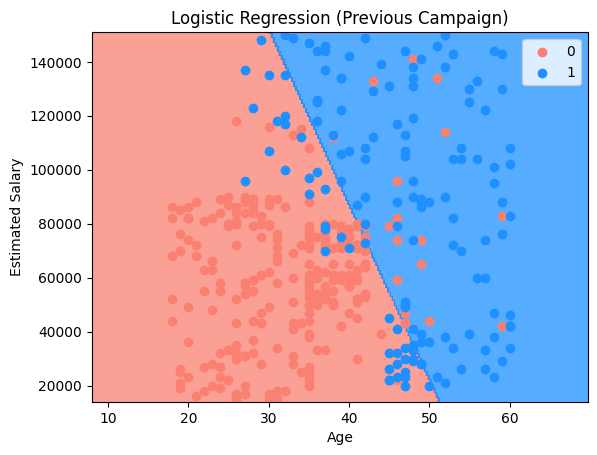

In [11]:
from matplotlib.colors import ListedColormap
import numpy as np
import matplotlib.pyplot as plt

# Use the scaler and scaled data already defined: se and X_ac
X_set, y_set = X, y

plt.contourf(
    X1, X2,
    cnn_model.predict(
        se.transform(np.array([X1.ravel(), X2.ravel()]).T)
    ).reshape(X1.shape),
    alpha=0.75, cmap=ListedColormap(('salmon', 'dodgerblue'))
)
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                color=ListedColormap(('salmon', 'dodgerblue'))(i), label=j)

plt.title('Logistic Regression (Previous Campaign)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

Importing new Project Data

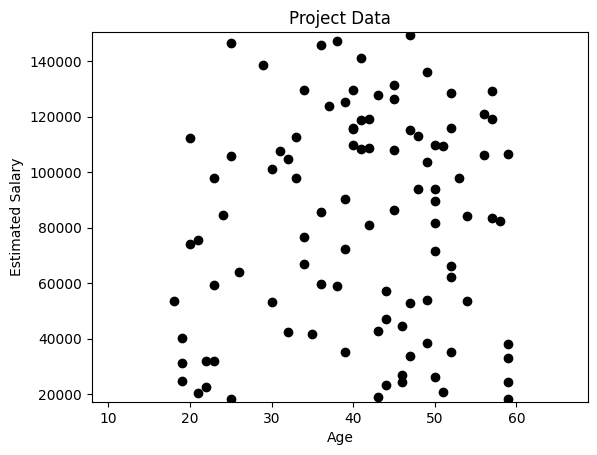

In [13]:
#Import Project data
project_dataset = pd.read_csv('..\\Dataset\\Get_excited_marketing_project.csv')

#Define the X variable
X_project = project_dataset.iloc[:, :].values

#plot the data
X_set = X_project
X1, X2 = np.meshgrid(
    np.arange(start=X_project[:, 0].min() - 10, stop=X_project[:, 0].max() + 10, step=0.25),
    np.arange(start=X_project[:, 1].min() - 1000, stop=X_project[:, 1].max() + 1000, step=0.25)
)

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
plt.scatter(X_set[:, 0], X_set[:, 1], color='black')
plt.title('Project Data')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.show()

Applying Our Model to a new Project

In [14]:
X_project_ac = se.transform(X_project)

y_project_pred = cnn_model.predict(X_project_ac)

Visualizing the Predictions

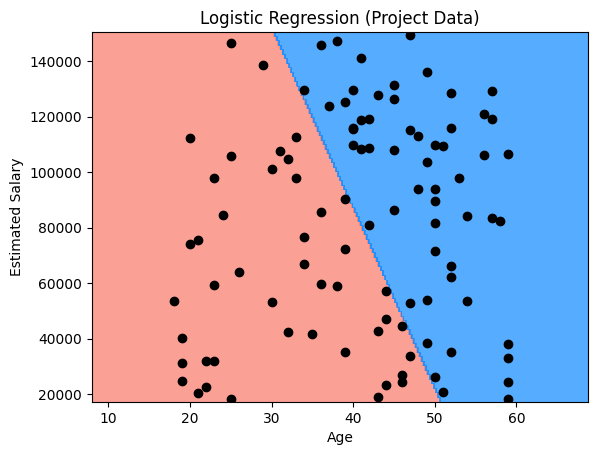

In [15]:
from matplotlib.colors import ListedColormap
X_set, y_set = se.inverse_transform(X_project_ac), y_project_pred
X1, X2 = np.meshgrid(
    np.arange(start=X_set[:, 0].min() - 10, stop=X_set[:, 0].max() + 10, step=0.25),
    np.arange(start=X_set[:, 1].min() - 1000, stop=X_set[:, 1].max() + 1000, step=0.25)
)

plt.contourf(
    X1, X2,
    cnn_model.predict(
        se.transform(np.array([X1.ravel(), X2.ravel()]).T)
    ).reshape(X1.shape),
    alpha=0.75, cmap=ListedColormap(('salmon', 'dodgerblue'))
)

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())    
plt.scatter(X_set[:, 0], X_set[:, 1], color='black')
plt.title('Logistic Regression (Project Data)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.show()